In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df= pd.read_csv('C:/Users/HP/Desktop/IMARTICUS/ML/EDA1-master/EDA1-master/titanic_train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [11]:
## Drop Name', 'Ticket', 'Cabin'

In [12]:
df.drop('Cabin',axis=1,inplace=True)

In [13]:
df.drop('Ticket',axis=1,inplace=True)

In [14]:
df.drop('Name',axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 9 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Sex          891 non-null    object 

 4   Age          714 non-null    float64

 5   SibSp        891 non-null    int64  

 6   Parch        891 non-null    int64  

 7   Fare         891 non-null    float64

 8   Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(2)

memory usage: 62.8+ KB


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

<AxesSubplot:>

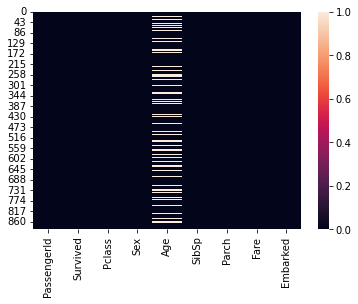

In [19]:
sns.heatmap(df.isnull())

# Interpolate for missing values

This means you can deduce the missing values by interpolating  existing values.

For example, if we have the series 1, 3, 4, ?, 6, 8,….What is the missing value

In [20]:
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()

<AxesSubplot:>

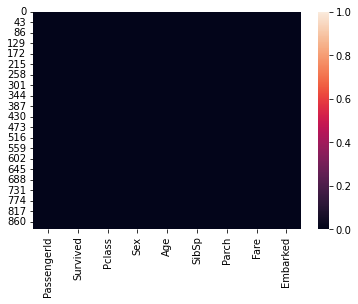

In [21]:
sns.heatmap(df.isnull())

In [22]:
##no null @ age

In [23]:
# Drop all rows with missin data
df = df.dropna()

In [24]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [25]:
##now no null values

In [27]:
df_categorical= df.select_dtypes(exclude=[object])
df_categorical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,22.5,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


# Convert categorical values to numeric by creating  dummy variables from the categorical columns

In [34]:
##dummy variable for categoris
# First, create dummy columns from the Embarked and Sex columns
##dummy variable for categoris
df = pd.get_dummies(df)
df.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [40]:
# Getting features and target
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Decision Tree

In [56]:
 # Using simple Decision Tree classifier
##Training
dt=tree.DecisionTreeClassifier(max_depth=5)


In [57]:
# double click on decision tree to see the tree 
plt.figure(figsize=(50,50))
tree.plot_tree(dt)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 3600x3600 with 0 Axes>

In [58]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [62]:
##lets predict our model
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [63]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[89, 20],
       [22, 47]], dtype=int64)

True positives: 47 
True negatives: 89 
False positives: 20 
False negatives: 22 

In [64]:
accuracy=(accuracy_score(y_test,y_pred)*100)
accuracy

76.40449438202246

In [ ]:
##76% of  testing set is correctly classied

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.80      0.82      0.81       109

           1       0.70      0.68      0.69        69



    accuracy                           0.76       178

   macro avg       0.75      0.75      0.75       178

weighted avg       0.76      0.76      0.76       178




In [67]:
#ROC CURVE
from sklearn.metrics import roc_curve, auc,roc_auc_score 

In [69]:
###PROB FOR EACH CLASS
Prob=dt.predict_proba(X_test)[:,1]
Prob

array([0.12690355, 1.        , 0.875     , 0.12690355, 1.        ,
       0.12690355, 0.12690355, 0.12690355, 1.        , 1.        ,
       0.12690355, 0.42105263, 0.        , 0.12690355, 0.12690355,
       0.12690355, 0.56521739, 0.        , 0.56521739, 0.        ,
       0.        , 1.        , 0.1       , 0.23809524, 0.12690355,
       0.16666667, 0.1       , 0.94117647, 0.56521739, 0.12690355,
       0.16666667, 0.875     , 0.12690355, 0.56521739, 0.23809524,
       0.        , 0.875     , 0.56521739, 0.12690355, 0.12690355,
       0.1       , 0.77777778, 0.12690355, 0.12690355, 0.23809524,
       0.23809524, 0.94117647, 0.12690355, 0.        , 1.        ,
       0.94117647, 0.875     , 0.12690355, 0.1       , 0.94117647,
       0.94117647, 0.875     , 0.        , 0.12690355, 0.12690355,
       0.42105263, 0.42105263, 1.        , 0.12690355, 0.94117647,
       0.12690355, 0.        , 0.16666667, 1.        , 1.        ,
       0.12690355, 1.        , 0.875     , 0.12690355, 0.42105

In [72]:
##auc score
dt_auc=roc_auc_score(y_test,Prob)
dt_auc
#####ie; goodness of the model is 86%

0.8627177237069539

In [73]:
#roc score
dt_fpr,dt_tpr,_=roc_curve(y_test,Prob)

In [75]:
dt_tpr

array([0.        , 0.37681159, 0.57971014, 0.65217391, 0.65217391,
       0.66666667, 0.68115942, 0.69565217, 0.8115942 , 0.85507246,
       0.89855072, 0.97101449, 0.97101449, 1.        ])

In [76]:
_

array([2.        , 1.        , 0.94117647, 0.875     , 0.77777778,
       0.57894737, 0.56521739, 0.45454545, 0.42105263, 0.23809524,
       0.16666667, 0.12690355, 0.1       , 0.        ])

In [74]:
dt_fpr

array([0.        , 0.02752294, 0.04587156, 0.0733945 , 0.09174312,
       0.11009174, 0.18348624, 0.19266055, 0.24770642, 0.27522936,
       0.33027523, 0.71559633, 0.79816514, 1.        ])

Text(0.5, 0, 'False Positive Rate')

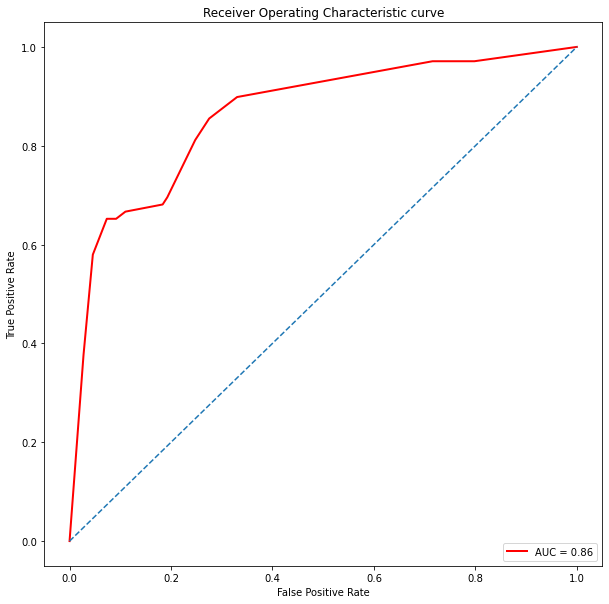

In [81]:
##ROC CURVE PLOT

plt.figure(figsize=(10,10))
lw=2
plt.title('Receiver Operating Characteristic curve')
plt.plot(dt_fpr,dt_tpr, color='red',lw=lw,label = 'AUC = %0.2f' % dt_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [78]:
###IMPORTANCE OF VARIABLE
fi=pd.DataFrame({'feature':list(X_train.columns),
                 'importance':dt.feature_importances_}).\
                  sort_values('importance',ascending=False)

In [79]:
fi

,feature,importance
7,Sex_male,0.500021
1,Pclass,0.130062
5,Fare,0.127931
2,Age,0.109297
0,PassengerId,0.081572
3,SibSp,0.026643
10,Embarked_S,0.015317
4,Parch,0.009155
6,Sex_female,0.000000
8,Embarked_C,0.000000


# Random Forest

In [82]:
from sklearn import ensemble


In [83]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)



RandomForestClassifier()

In [84]:
rf.score(X_test, y_test)

0.7865168539325843

In [85]:
##actual class prediction
y_predRF=rf.predict(X_test)
y_predRF

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [86]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support



           0       0.83      0.83      0.83       109

           1       0.72      0.72      0.72        69



    accuracy                           0.79       178

   macro avg       0.78      0.78      0.78       178

weighted avg       0.79      0.79      0.79       178




In [87]:
###PROB FOR EACH CLASS
Prob_pred=rf.predict_proba(X_test)[:,1]
Prob_pred

array([0.27, 0.98, 0.53, 0.12, 0.99, 0.03, 0.04, 0.  , 1.  , 1.  , 0.25,
       0.37, 0.  , 0.39, 0.11, 0.11, 0.58, 0.28, 0.36, 0.01, 0.19, 0.94,
       0.12, 0.2 , 0.  , 0.19, 0.24, 0.96, 0.36, 0.02, 0.36, 0.81, 0.18,
       0.61, 0.04, 0.22, 0.98, 0.51, 0.37, 0.09, 0.17, 0.25, 0.02, 0.01,
       0.8 , 0.17, 1.  , 0.14, 0.07, 0.96, 0.95, 1.  , 0.48, 0.05, 0.95,
       0.97, 0.51, 0.21, 0.54, 0.1 , 0.29, 0.62, 0.98, 0.7 , 0.87, 0.21,
       0.09, 0.54, 1.  , 0.98, 0.05, 0.99, 0.69, 0.  , 0.45, 0.94, 0.22,
       0.03, 0.84, 0.66, 0.32, 0.95, 0.96, 0.67, 0.09, 0.18, 0.  , 0.07,
       0.  , 0.4 , 0.04, 0.43, 0.03, 0.04, 0.72, 0.5 , 0.01, 0.03, 0.62,
       0.06, 0.02, 0.99, 0.01, 0.17, 0.07, 0.03, 0.36, 0.96, 0.11, 0.01,
       0.01, 0.11, 0.11, 0.99, 0.11, 0.19, 0.17, 0.01, 0.38, 0.31, 0.82,
       1.  , 0.03, 0.05, 1.  , 0.96, 0.37, 0.99, 0.75, 0.42, 0.99, 0.28,
       0.31, 0.03, 0.28, 0.95, 0.1 , 0.93, 0.32, 0.99, 0.72, 0.02, 0.98,
       0.23, 1.  , 0.21, 0.3 , 0.9 , 0.04, 1.  , 0.

In [88]:
##auc score
r_auc=roc_auc_score(y_test,Prob_pred)
r_auc

0.8306076319638347

In [89]:
#####ie; goodness of the model is 83%

In [90]:
#roc score
r_fpr,r_tpr,_=roc_curve(y_test,Prob_pred)


Text(0.5, 0, 'False Positive Rate')

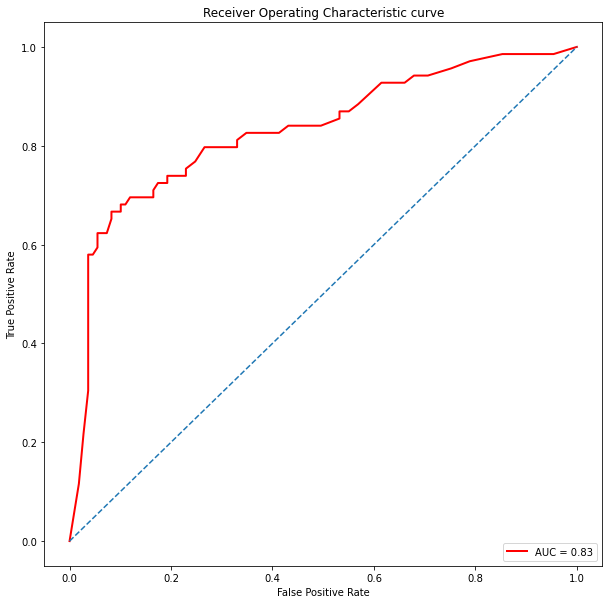

In [91]:
##ROC CURVE PLOT

plt.figure(figsize=(10,10))
lw=2
plt.title('Receiver Operating Characteristic curve')
plt.plot(r_fpr,r_tpr, color='red',lw=lw,label = 'AUC = %0.2f' % r_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [92]:
###IMPORTANCE OF VARIABLE
fi=pd.DataFrame({'feature':list(X_train.columns),
                 'importance':rf.feature_importances_}).\
                  sort_values('importance',ascending=False)

In [93]:
fi

,feature,importance
0,PassengerId,0.180732
2,Age,0.177101
5,Fare,0.170501
7,Sex_male,0.161649
6,Sex_female,0.106474
1,Pclass,0.088976
3,SibSp,0.044675
4,Parch,0.029470
10,Embarked_S,0.015669
8,Embarked_C,0.015517


# Perform Classification Using Gradient Boosting Classifier

In [95]:
##This classifier is available in the ensemble module which we already imported.
#So we don’t need to import anything

In [ ]:
#We could try to improve the gradient boosting classifier. 
#This we can do by adding a hyperparameterning.
#Here, we add n_estimators to be 50

In [96]:
gb = ensemble.GradientBoostingClassifier(n_estimators=50)


In [97]:
gb.fit(X_train, y_train)


GradientBoostingClassifier()

In [98]:
gb.score(X_test, y_test)

0.8089887640449438

In [99]:
##81 % of test set are correctle classified